In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import seaborn as sns
import os
import re
import time
import pickle

sns.set()

Using TensorFlow backend.


In [2]:
def reading_in_data(filename):
    
    filename = str(filename)

    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    return new_dict

In [3]:
input_data = reading_in_data("preprocessed_data")
#input_data = reading_in_data("preprocessed_data1")

In [4]:
len(input_data['IMAGES'])

13972

In [5]:
train_images = input_data['IMAGES'][:9666, :, :, :]
print(np.shape(train_images))
train_labels = input_data['LABELS'][:9666]
print(np.shape(train_labels))

val_images = input_data['IMAGES'][9666:11736, :, :, :]
print(np.shape(val_images))
val_labels = input_data['LABELS'][9666:11736]
print(np.shape(val_labels))

test_images = input_data['IMAGES'][11736:13972, :, :, :]
print(np.shape(test_images))
test_labels = input_data['LABELS'][11736:13972]
print(np.shape(test_labels))

(9666, 1, 3681, 1)
(9666,)
(2070, 1, 3681, 1)
(2070,)
(2236, 1, 3681, 1)
(2236,)


In [6]:
print(train_images[0])
print(np.shape(train_images[0]))

[[[0.56301564]
  [0.51696211]
  [0.49345914]
  ...
  [0.14337407]
  [0.18616399]
  [0.18317693]]]
(1, 3681, 1)


In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(12, (1, 12), activation='relu', input_shape=(1, 3681, 1), data_format='channels_last'))
model.add(keras.layers.MaxPooling2D( (1, 4)))

model.add(keras.layers.Conv2D(18, (1, 6), activation='relu', data_format='channels_last'))
model.add(keras.layers.MaxPooling2D((1, 4)))

model.add(keras.layers.Conv2D(24, (1, 6), activation='relu', data_format='channels_last'))
model.add(keras.layers.MaxPooling2D((1, 4)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 256, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))


opt = keras.optimizers.SGD(lr = 5e-3, momentum = 0.25, decay = 1e-5)
model.compile(loss='binary_crossentropy', optimizer = opt  , metrics = ['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 3670, 12)       156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 917, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 912, 18)        1314      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 228, 18)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 223, 24)        2616      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 55, 24)         0         
_________________________________________________________________
flat

In [8]:
history = model.fit(train_images,
train_labels,
epochs= 20,
batch_size= 64,
validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 9666 samples, validate on 2070 samples
Epoch 1/20
9666/9666 [==============================] - 11s 1ms/step - loss: 0.6503 - acc: 0.5749 - val_loss: 0.5949 - val_acc: 0.6676
Epoch 2/20
9666/9666 [==============================] - 10s 1ms/step - loss: 0.5411 - acc: 0.7372 - val_loss: 0.4687 - val_acc: 0.7947
Epoch 3/20
9666/9666 [==============================] - 10s 1ms/step - loss: 0.4274 - acc: 0.8201 - val_loss: 0.3840 - val_acc: 0.8343
Epoch 4/20
9666/9666 [==============================] - 10s 1ms/step - loss: 0.3473 - acc: 0.8476 - val_loss: 0.3104 - val_acc: 0.8667
Epoch 5/20
9666/9666 [==============================] - 10s 1ms/step - loss: 0.2581 - acc: 0.8921 - val_loss: 0.1952 - val_acc: 0.9193
Epoch 6/20
9666/9666 [==============================] - 10s 1ms/step - loss: 0.1611 - acc: 0.9350 - val_loss: 0.1378 - val_acc: 0.9498
Epoch 7/20
9666/9666 [==============================] - 10s 1ms/step - loss: 0.1052 - acc: 0.9

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss = ' +str(test_loss))
print('Test accuracy = ' +str(test_acc))

2236/2236 [==============================] - 1s 284us/step
Test loss = 0.032255850545728784
Test accuracy = 0.995080501107709


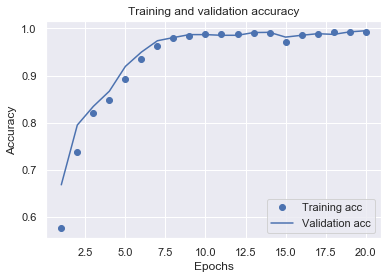

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

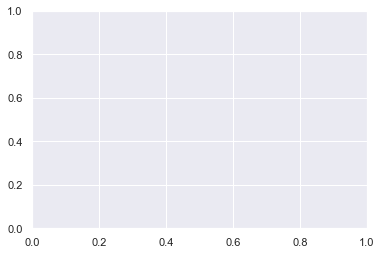

In [13]:
model.save('CNN_V1.h5')